In [1]:
from datetime import date
import statistics
from collections import Counter
import os

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import table 
import matplotlib.pyplot as plt
import matplotlib.table as table
import seaborn as sns
from scipy import stats

In [2]:
repos = pd.read_csv("../collect_repositories/results/repositories_filtered_2021-11-24.csv")
how_fair_is = pd.read_csv("output/repositories_howfairis_2021-11-24.csv")
languages = pd.read_csv("output/languages_2021-11-24.csv")
contributors = pd.read_csv("output/contributors_2021-11-24.csv")
topics = pd.read_csv("output/topics_2021-11-24.csv")
export_path_graphs = "../graphs/"

## Filtering for research groups or private users only

In [ ]:
users = pd.read_excel("../collect_users/results/users_enriched_updated_2021-11-24.xlsx")

In [4]:
def add_research_group_filter(dataset):
    user_is_research_group = []
    for row in dataset.iterrows():
        try:
            owner = row[1]['owner']
        except:
            owner = row[1]['html_url_repository'].split('/')[-2]
            
            
      
        row_users = users.loc[users['user_id'] == owner]
        if len(row_users['is_research_group']) == 0:
            user_is_research_group.append(False)
        for i in row_users['is_research_group']:
            if i == 1:
                user_is_research_group.append(True)
                break
            else:
                user_is_research_group.append(False)
                break
                    
    return user_is_research_group
    

In [5]:
repos['is_research_group'] = add_research_group_filter(repos)
contributors['is_research_group'] = add_research_group_filter(contributors)
topics['is_research_group'] = add_research_group_filter(topics)
languages['is_research_group'] = add_research_group_filter(languages)
how_fair_is['is_research_group'] = add_research_group_filter(how_fair_is)

## Run to filter for only private users

In [6]:
repos = repos[~repos['is_research_group']]
contributors = contributors[~contributors['is_research_group']]
topics = topics[~topics['is_research_group']]
languages = languages[~languages['is_research_group']]
how_fair_is = how_fair_is[~how_fair_is['is_research_group']]
export_path_graphs = '../private_user_graphs/'

## Run to filter for only research groups

In [7]:
repos = repos[repos['is_research_group']]
contributors = contributors[contributors['is_research_group']]
topics = topics[topics['is_research_group']]
languages = languages[languages['is_research_group']]
how_fair_is = how_fair_is[how_fair_is['is_research_group']]
export_path_graphs = '../research_group_graphs/'

### Run to create folders if they don't exist

In [8]:
if not os.path.isdir(export_path_graphs):
    os.makedirs(export_path_graphs)

## Datasets

Using the github API and the Howfairis software, we collected data on the repositories, their FAIRness, the languages used in the repository, the amount of contributors for each repository and the topics mentoined in each repository. 

The Howfairis software gives  boolean value on five measures of FAIRness for each repository. These five measures consist of having a repository (which is always True for our dataset), having a license, being available in a registry, allowing citation of the software and following the FAIR software quality checklist. Below, the first five rows of the datasets are displayed. 

In [9]:
repos

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,allow_forking,is_template,topics,visibility,forks,open_issues,watchers,default_branch,permissions,is_research_group


In [10]:
how_fair_is

,id,node_id,name,full_name,private,owner,html_url,description,fork,url,...,open_issues,watchers,default_branch,permissions,howfairis_repository,howfairis_license,howfairis_registry,howfairis_citation,howfairis_checklist,is_research_group


In [11]:
languages

,html_url_repository,language,num_chars,is_research_group


In [12]:
contributors

,html_url_repository,login,id,node_id,avatar_url,gravatar_id,url,html_url,followers_url,following_url,...,starred_url,subscriptions_url,organizations_url,repos_url,events_url,received_events_url,type,site_admin,contributions,is_research_group


In [13]:
topics

,html_url_repository,topic,is_research_group


In [14]:
print("The repository data from Github contains the following columns:")
print(repos.columns)

The repository data from Github contains the following columns:
Index(['id', 'node_id', 'name', 'full_name', 'private', 'owner', 'html_url',
       'description', 'fork', 'url', 'forks_url', 'keys_url',
       'collaborators_url', 'teams_url', 'hooks_url', 'issue_events_url',
       'events_url', 'assignees_url', 'branches_url', 'tags_url', 'blobs_url',
       'git_tags_url', 'git_refs_url', 'trees_url', 'statuses_url',
       'languages_url', 'stargazers_url', 'contributors_url',
       'subscribers_url', 'subscription_url', 'commits_url', 'git_commits_url',
       'comments_url', 'issue_comment_url', 'contents_url', 'compare_url',
       'merges_url', 'archive_url', 'downloads_url', 'issues_url', 'pulls_url',
       'milestones_url', 'notifications_url', 'labels_url', 'releases_url',
       'deployments_url', 'created_at', 'updated_at', 'pushed_at', 'git_url',
       'ssh_url', 'clone_url', 'svn_url', 'homepage', 'size',
       'stargazers_count', 'watchers_count', 'language', 'has_i

## Different licenses 

A license is important because it shows that people have permission to use and modify your code. In our dataset,the most common one is MIT license, followed by GNU General Public license.  The plot below shows the value count of different licenses. 


IndexError: index 0 is out of bounds for axis 0 with size 0

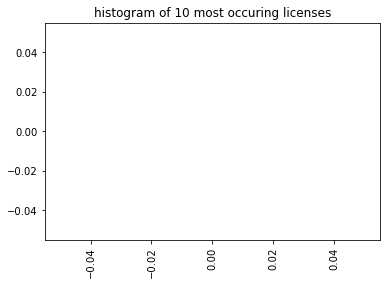

In [15]:
#first 10 licences
repos["license"].value_counts().head(10).plot(kind='bar', title='histogram of 10 most occuring licenses')
plt.savefig(export_path_graphs + "licenses_first10.png" ,bbox_inches="tight")

In [ ]:
#all licences
repos["license"].value_counts().plot(kind='bar', title = 'histogram of all licences')
plt.savefig(export_path_graphs + "licenses_all.png" ,bbox_inches="tight")

In [ ]:
value_count_licenses  = repos["license"].value_counts().head(10)
percentage_count_licences = [[license, value_count/repos["license"].value_counts().sum()*100] for value_count,license in zip(value_count_licenses,value_count_licenses.keys())]
percentage_pd = pd.DataFrame(percentage_count_licences, columns = ['license','percentage'])
percentage_pd  = percentage_pd.set_index('license')
percentage_pd.plot(kind='bar', title='histogram of 10 most occuring licenses, percentage-based')
plt.savefig(export_path_graphs + "licenses_percentages.png" ,bbox_inches="tight")


Below, the propotion of licenses compared to the total is shown, with their absolute count shown below that. . 

In [ ]:

for key,i in zip(repos["license"].value_counts().keys(), repos["license"].value_counts()):
    print(key + '{}: {:.3f}'.format(key, i/sum(repos["license"].value_counts())))
    #print(i/sum(repos["license"].value_counts()))


In [ ]:
repos["license"].value_counts().to_excel('license_names.xlsx')


In [ ]:
percentage_license = int(repos["license"].isna().value_counts()[1]/len(repos)* 100)
print("{} % of repositories have any kind of license on their page ".format(percentage_license))

## Languages

The programming language that is used in the repository gives information on the type of project the repository is. data analysis is mostly done in R and Python, though Python is used for other purposes as well. 

In [ ]:
repos["language"].value_counts().plot(kind='bar', figsize = (100,100), fontsize = 100)
plt.title("programming languages histogram", fontsize = 100)
plt.savefig(export_path_graphs + '/language_plot.png')

In [ ]:
repos["language"].value_counts().head(10).plot(kind='bar', figsize = (50,50), fontsize = 50)
plt.title("histogram of 10 most occuring programming languages", fontsize = 50)
plt.savefig(export_path_graphs + '/language_plot.png')

In [ ]:
value_count_licenses  = repos["language"].value_counts().head(10)
percentage_count_licences = [[language, value_count/repos["language"].value_counts().sum()*100] for value_count,language in zip(value_count_licenses,value_count_licenses.keys())]
percentage_pd = pd.DataFrame(percentage_count_licences, columns = ['language','percentage'])
percentage_pd  = percentage_pd.set_index('language')
percentage_pd.plot(kind='bar', title='histogram of 10 most occuring languages, percentage-based')
plt.savefig(export_path_graphs + "languages_percentages.png" ,bbox_inches="tight")


## relative occurence languages

In [ ]:
sum_five = 0
times = 0
for key,i in zip(repos["language"].value_counts().keys(), repos["language"].value_counts()):
    print(key)
    print(i/sum(repos["language"].value_counts()))
    sum_five += i/sum(repos["language"].value_counts())
    times += 1
    if times ==10:
        break
    
    
print(sum_five)

## The following percentages represent the percentage of repositories that contains that specific language for the 10 most occuring languages:

In [ ]:
for value, language in zip(languages["language"].value_counts().head(10), languages["language"].value_counts().head(10).keys()):
    percentage = value / len(repos) * 100
    print("{} is present in {:.2f} % of all repositories". format(language, percentage))

## correlation table top 10 languages

In [ ]:
languages["language"].value_counts().head(10).keys()
dict_languages_user = Counter()
for language in languages["language"].value_counts().head(10).keys():
    dict_top_languages[language] = 0

In [ ]:
dict_users = {}

In [ ]:

for html_url in repos['html_url']: 
    #print(html_url)
    rows_language_for_one_user = languages.loc[languages['html_url_repository'] == html_url]
    dict_languages_user = Counter()
    for language in languages["language"].value_counts().head(10).keys(): #set all values of languages that need to be present to create a dataset in a later stage to zero
        dict_languages_user[language] = 0
    for language in rows_language_for_one_user['language']:
        if language in dict_languages_user: #only count languages in the top 10
            dict_languages_user[language] += 1
    dict_users[html_url] = dict_languages_user #each user has a dict with 10 booleans representing whether the top 10 language is present in their repo or not


In [ ]:
languages_per_repo = pd.DataFrame.from_dict(dict_users, orient = 'index')

In [ ]:
languages_per_repo.corr().round(decimals = 2)

## Topics

Topics describe the context of the repository. 

In [ ]:
topics['topic'].value_counts().nlargest(50)

In [ ]:
topics['topic'].value_counts().nlargest(10).plot(kind = 'bar', title = 'histogram of 10 most occuring topics')
plt.savefig(export_path_graphs + '/10_most_occuring_topics.png')

## number of  contributors

The number of contributors gives information on how many people put effort into the repository. Theoratically, it would make sense if a higher amount of contributors implied a more FAIR repository, because those are easier to find in a registery and work on because of their license. 


In [ ]:
contributors['html_url_repository'].value_counts().plot(kind = 'hist' ,x = 'contributors', figsize = (10,10), fontsize = 12, title = 'histogram number of contributors')
plt.savefig(export_path_graphs + '/contributors.png')


In [ ]:
contributors['html_url_repository'].value_counts().nlargest(20, keep = 'all')


In [ ]:
print('mean contributors: {:.2f}'.format(statistics.mean(contributors['html_url_repository'].value_counts())))
print('median contributors: {}'.format(statistics.median(contributors['html_url_repository'].value_counts())))

## Howfairis sum score descriptives and correlations

In this section, the median and meand of the howfairis sum score is shown, as well as correlations the how fair is sum score, the amount of contributors and the amount of months since the last commit

In [ ]:
how_fair_sum_scores = []
for index, row in how_fair_is.iterrows():
    how_fair_is_sum = row['howfairis_repository'] + row['howfairis_license'] +row['howfairis_registry'] + row['howfairis_citation'] + row['howfairis_checklist']
    how_fair_sum_scores.append(how_fair_is_sum)

In [ ]:
how_fair_is['how_fair_sum_scores'] = how_fair_sum_scores
print("mean: {:.2f}".format(statistics.mean(how_fair_sum_scores)))
print("median: {}".format(statistics.median(how_fair_sum_scores)))
pd.DataFrame((statistics.mean(how_fair_sum_scores), statistics.median(how_fair_sum_scores)),["mean", "median"])
how_fair_is.boxplot(column = 'how_fair_sum_scores')
plt.title('boxplot of the howfair is sumscore')
plt.savefig(export_path_graphs + '/howfairissum_boxplot.png')


In [ ]:
how_fair_is['how_fair_sum_scores'].plot(kind = 'hist', title = 'histogram how fair is')
plt.savefig(export_path_graphs + '/howfairissum_histogram.png')


In [ ]:
correlation_df = pd.DataFrame()

In [ ]:
correlation_df['how_fair_sum_scores'] = how_fair_sum_scores
correlation_df['contributions']= contributors['contributions']
correlation_df['months_ago_most_recent_commit'] = repos['months_ago_most_recent_commit']

In [ ]:
correlation_df.corr(method='pearson').round(decimals=2)

## Binary correlation plot between howfairis variables

A correlation table that shows the correlation between the howfairis measures.

In [ ]:
correlation_how_fair_is = pd.DataFrame()

#correlation_how_fair_is['howfairis_repository'] = how_fair_is['howfairis_repository']
correlation_how_fair_is['howfairis_license'] = how_fair_is['howfairis_license']
correlation_how_fair_is['howfairis_registry'] = how_fair_is['howfairis_registry']
correlation_how_fair_is['howfairis_citation'] = how_fair_is['howfairis_citation']
correlation_how_fair_is['howfairis_checklist'] = how_fair_is['howfairis_checklist']



In [ ]:
correlation_how_fair_is.corr(method='pearson').round(decimals=2) #howfairis_repository is all true, so has no variance

## Programming language and Howfairis

Different programming languages need different licences. For some languages (e.g. python), these are more complex. How does this influence the HowFairis score?

In [ ]:
languages['language'].value_counts().nlargest(10)

In [ ]:
index_how_fair_is = 0
language_how_fair_is_df = []
#get a list with the how-fair-is scores added to the language dataset
for index,row in languages.iterrows():
    if how_fair_is['html_url'][index_how_fair_is] != languages['html_url_repository'][index]:
        index_how_fair_is += 1 
    sum_score = how_fair_is['how_fair_sum_scores'][index_how_fair_is]
    language_how_fair_is_df.append(sum_score)
regression_data_how_fair_is_language = pd.DataFrame()
language_data_dummies = pd.get_dummies(languages['language'])  #one hot-encoding for language dataset
regression_data_how_fair_is_language['how_fair_is_sum'] = language_how_fair_is_df
languages['how_fair_sum_scores'] = regression_data_how_fair_is_language #add scores to language dataset

In [ ]:
train_size = int(len(languages) * 0.8) #training size is 2227, testing size is  557
regression_how_fair_is_language_train_X = language_data_dummies[:train_size]
regression_how_fair_is_language_train_y = regression_data_how_fair_is_language['how_fair_is_sum'][:train_size]
regression_how_fair_is_language_test_X = language_data_dummies[train_size:]
regression_how_fair_is_language_test_y = regression_data_how_fair_is_language['how_fair_is_sum'][train_size:]

In [ ]:
#train regression
regression_language_how_fair_is = LinearRegression()
regression_language_how_fair_is.fit(regression_how_fair_is_language_train_X, regression_how_fair_is_language_train_y)

# Make predictions using the testing set
language_how_fair_is_y_pred = regression_language_how_fair_is.predict(regression_how_fair_is_language_test_X)

# The coefficients
#print('Coefficients: \n', regression_language_how_fair_is.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(regression_how_fair_is_language_test_y, language_how_fair_is_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(regression_how_fair_is_language_test_y, language_how_fair_is_y_pred))


In [ ]:
language_subset = language_data_dummies[['Python', 'Shell', 'R', 'JavaScript', 'HTML']] #top 5 languages


In [ ]:
train_size = int(len(language_subset) * 0.8)
regression_how_fair_is_language_train_X = language_subset[:train_size]
regression_how_fair_is_language_train_y = regression_data_how_fair_is_language['how_fair_is_sum'][:train_size]
regression_how_fair_is_language_test_X = language_subset[train_size:]
regression_how_fair_is_language_test_y = regression_data_how_fair_is_language['how_fair_is_sum'][train_size:]

In [ ]:
#train regression
regression_language_how_fair_is = LinearRegression()
regression_language_how_fair_is.fit(regression_how_fair_is_language_train_X, regression_how_fair_is_language_train_y)

# Make predictions using the testing set
language_how_fair_is_y_pred = regression_language_how_fair_is.predict(regression_how_fair_is_language_test_X)

# The coefficients
print('Coefficients: \n', regression_language_how_fair_is.coef_)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(regression_how_fair_is_language_test_y, language_how_fair_is_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(regression_how_fair_is_language_test_y, language_how_fair_is_y_pred))


A simple regression for predicting the how fair is score from  all or a subset of languages does not seem to yield any results 

## Examples of high howfairis scores 

In this section, some links to the pages that have a high howfairis score are shown. 

In [ ]:
how_fair_is_high_scores = how_fair_is[how_fair_is['how_fair_sum_scores'] > 3]

how_fair_is_high_scores['html_url']

## Re-use of other projects and articles

Are there competitors?
How do they relate to each other?